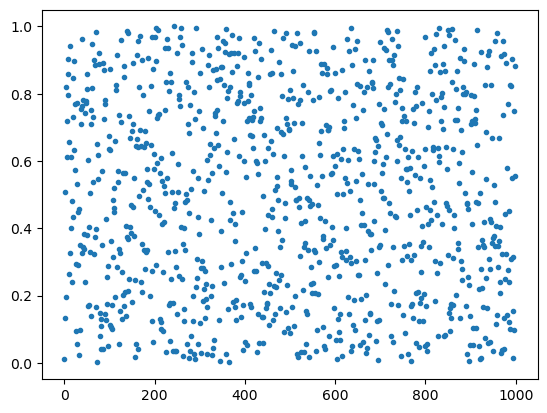

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(1000), np.random.random(1000), '.')
#plt.savefig('images/numpy-random.png')
plt.show()

In [421]:
import numpy as np

def init_lattice(n):
    
    lattice = np.random.choice([1, -1], size=(n, n))
    return lattice


def ising(n=10,nsteps=10000,J1=1,J2=0.5,J3=0.2,T=1):

    
    
    lattice = init_lattice(n)
    energy = 0
    energies = []
    spins = []
    spin = np.sum(lattice)
    for step in range(nsteps):

        i = np.random.randint(n)
        j = np.random.randint(n)

        # Periodic Boundary Condition
        Sn_list =[J1*lattice[(i - 1) % n, j], J1*lattice[(i + 1) % n, j] ,
        J1*lattice[i, (j - 1) % n] , J1*lattice[i, (j + 1) % n] +
        J2*lattice[(i - 1) % n, (j - 1)%n] , J2*lattice[(i + 1) % n,(j - 1)%n] ,
        J2*lattice[(i - 1) % n, (j + 1)%n] , J2*lattice[(i + 1) % n,(j + 1)%n] ,
        J3*lattice[(i - 2) % n, j] , J3*lattice[(i + 2) % n, j] ,
        J3*lattice[i, (j - 2) % n] , J3*lattice[i, (j + 2) % n]]
        Sn=sum(Sn_list)
        S0=lattice[i, j]
        dE =  2 * S0 * Sn

        if dE < 0 or np.random.random() < np.exp(-dE/T):
            lattice[i, j] = -lattice[i, j]
            
            energy += dE
            

            spin += 2*lattice[i, j]
            
        spins.append(spin)
        
        energies.append(energy)
  
    
    return  energies
    



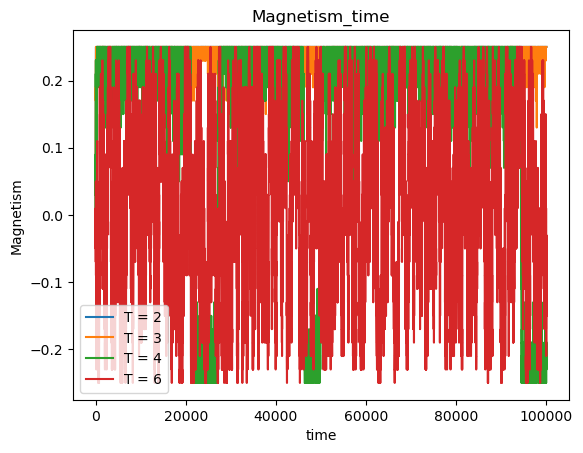

In [455]:
#from ising import *

temperatures = [2,3,4,6]
spins=0
for T in temperatures:

    spins= ising(n=5, nsteps = 100000, T=T)
    spins = np.array(spins) / 100
    plt.plot(range(len(spins)), spins, label = 'T = {0}'.format(T))
plt.legend(loc = 'best')
plt.xlabel('time')
plt.ylabel('Magnetism')
plt.title('Magnetism_time')
#plt.ylim(-1.2, 1.2)
#plt.savefig('images/average-spin.png')
plt.show()



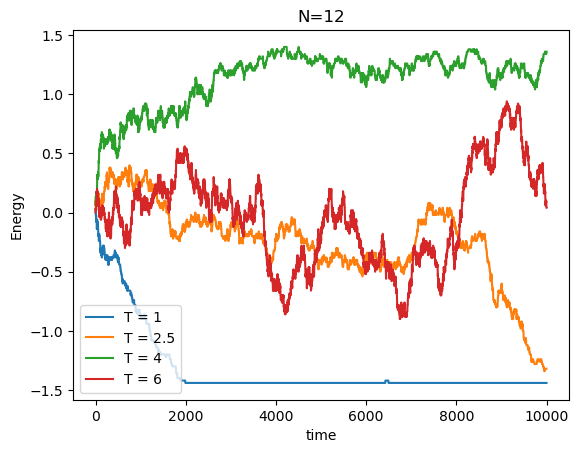

In [496]:
temperatures = [1,2.5,4,6]

for T in temperatures:

    energies = ising(n=12, nsteps = 10000, T=T)
    energies= np.array(energies) / 100
    plt.plot(range(len(energies)), energies, label = 'T = {0}'.format(T))
    
plt.legend(loc = 'best')
plt.xlabel('time')
plt.ylabel('Energy')
plt.title('N=12')
#plt.ylim(-1.2, 1.2)
#plt.savefig('images/average-spin.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


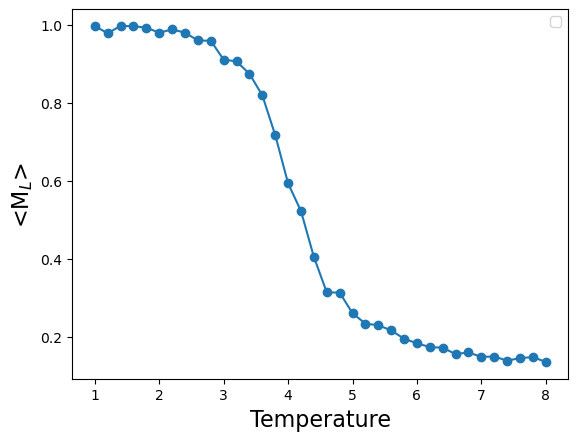

In [463]:
avgspins=[]
T=np.arange(1,8.2,0.2).tolist()
#print(T)
for t in T:
    spins=(ising(n=10,nsteps=100000,J1=1,J2=0.5,J3=0,T=t))
    avgspin = np.sum(np.abs(spins)) / n ** 2 / len(spins)
    avgspins.append(avgspin)
plt.plot(T, avgspins, 'o-')
plt.xlabel('Temperature', fontsize = 16)
plt.ylabel('<M$_{L}$>', fontsize = 16)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


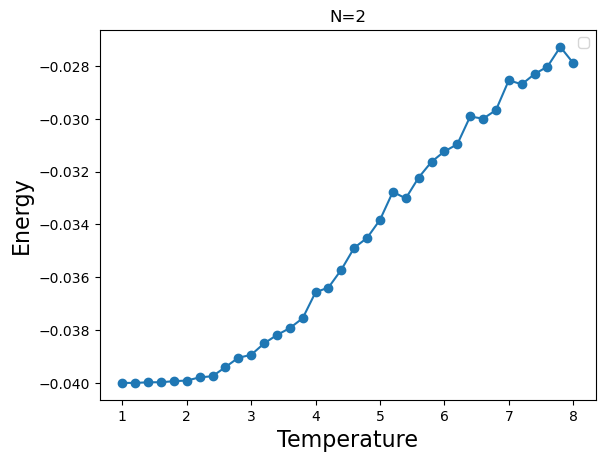

In [484]:
avgenergies=[]
T=np.arange(1,8.2,0.2).tolist()
#print(T)
for t in T:
    energies=(ising(n=2, nsteps = 10000, T=t))
    avgenergie = -np.sum(np.abs(energies)) / n ** 2 / len(energies)
    avgenergies.append(avgenergie)
plt.plot(T, avgenergies, 'o-')
plt.xlabel('Temperature', fontsize = 16)
plt.ylabel('Energy', fontsize = 16)
plt.title('N=2')
plt.legend()
plt.show()
